## BASIC SENTIMENT ANALYSIS

### PROBLEM STATEMENT:-

We are given a labelled dataset which has the text and the sentiment associated with it which is either neutral or negative. This kind of a problem is often referred to as a sentiment analysis problem.

### TASK:-

The task or the objective of this problem is to classify an unknown text into neutral or negative by building a model which would learn the mapping from the input text to the labels thereby achieving the task on the unseen test data point.

### BRIEF ABOUT THE DATA:-

There are around 18,999 text or sentiments given. These are the columns/features in the data given to us representing each text:-

1) <b>TextID</b> - A unique ID representing each text.

2) <b>Text</b> - The text denoting what a person said.

3) <b>Sentiment</b> - The label given to the data which denotes whether the text or the speech said is negative or neutral.

### BUSINESS CONSTRAINT:-

1) The model built should not miss out the negative sentiment essentially meaning that all the negative sentiment texts should be aimed to be captured.

2) The model should not take too long to give the sentiment of a text.

### MAPPING TO A ML PROBLEM:-

As this is a problem with a labelled text, so it is a supervised Machine Learning Problem which is a binary classification problem with two labels as neutral or negative.

### POSITIVE CLASS OF INTEREST:-

We would consider negative as the positive class of interest which we don't want to miss out.

### PERFORMANCE METRIC:-

We would try to predict all the negatives which are present in the given training data as accurately as possible, which is infact the positive class of interest. So, we would try to maximize the <b> Recall </b> of the ML algorithm and would choose the right threshold for classifying a given text as negative for the same.

### EDA AND PREPROCESSING OF THE DATA:-

<b> EDA would include the following:- </b>

1) Checking the number of rows and columns of the data.

2) Checking for no text and removing the same.

3) Checking for duplicate text and removing the same.

4) Checking the distribution of the two classes negative and neutral.

5) Checking the top 5% frequently occuring words in each class.

6) Checking the top 5% IDF scores for each class.

<b> Preprocessing of the data would include:- </b>

1) Decontracting the data as replacing aren't with are not, isn't with is not and so on...

2) Removal of punctuation marks from the whole data.

3) Removal of stopwords from the whole data which should be a customized set of stop words as we have to keep the stop word not in our data as it is a major determining factor of a negative sentiment.

4) Removal of numbers.

5) Removal of any braces which would denote HTML tags.

6) Removal of any other special characters except the alphabets.

7) Converting every word to lowercase.

### TOOLS/ENVIRONMENT USED:-

Python Jupyter Notebook

### EDA AND PREPROCESSING OF THE DATA

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
#from nltk.stem import PorterStemmer,SnowballStemmer
from nltk.stem import WordNetLemmatizer
import math
import nltk
nltk.download('wordnet')
from collections import Counter
import os
from wordcloud import WordCloud

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Wazir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Reading the data

data = pd.read_csv('data.csv')

In [3]:
# Checking the top 5 rows of the data

data.head()

,textID,text,sentiment
0,2a0463352b,that`s enough! I`ll do nothing for 2 hours.,neutral
1,f358968122,I have to go clothes shopping tomorrow I hate...,negative
2,449e7733f1,i am bored. :| any idea`s of a nice site?,neutral
3,6099baf6e8,I don`t think will want to come back (guys r...,negative
4,f946da7a04,_thomas if only the drinking game was tonight....,neutral


In [4]:
# Checking the shape of the data

print("The data has {} number of texts and {} number of given features".format(data.shape[0],data.shape[1]))

The data has 18899 number of texts and 3 number of given features


In [5]:
# Checking the distribution of the classes negative and neutral

# Checking the frequency of the class labels in the given training data
class_distdf = data.sentiment.value_counts().reset_index()

# Renaming the columns
class_distdf.columns = ['sentiment','no_of_text']

# Getting the percentage of the class labels
class_distdf['percentage'] = class_distdf['no_of_text'].values/np.sum(class_distdf.no_of_text, axis=0)

class_distdf

,sentiment,no_of_text,percentage
0,neutral,11118,0.588285
1,negative,7781,0.411715


Text(0.5, 1.0, 'Bar Plot showing the distribution of the sentiments')

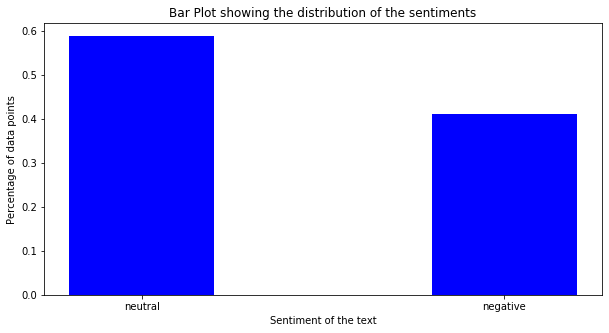

In [6]:
# Visualizing the bar plot of the sentiment columns for a better understanding

plt.figure(figsize = (10,5))
plt.bar(class_distdf.sentiment, class_distdf.percentage, color = 'blue', width = 0.4)
plt.xlabel('Sentiment of the text')
plt.ylabel('Percentage of data points')
plt.title('Bar Plot showing the distribution of the sentiments')

#### OBSERVATIONS:-

1) The dataset given is a slightly imbalanced dataset with the positive class of interest having a slight skew.

#### REMOVAL OF EMPTY AND DUPLICATE ROWS

In [7]:
# Replacing the nan values with space

data.fillna('', inplace=True)

In [8]:
# Checking for no text

def check_no_text(df, col_index):
    return [i for i in range(len(df)) if len(str(df.iloc[i,col_index]).split())==0]

In [9]:
# Calling the function check_no_text to check the index which has no text

list_of_indices = check_no_text(data, 1)

list_of_indices

[8384]

In [10]:
# Dropping the row which has no text

data = data.drop(labels = list_of_indices, axis = 0)

In [11]:
# Checking whether there are two same textIDs in the data

duplicate_IDs = data[data.duplicated(subset = 'textID')]

duplicate_IDs

,textID,text,sentiment


In [12]:
# Checking whether there are two same texts in the data

duplicate_text = data[data.duplicated(subset = ['text','sentiment'])]

duplicate_text

,textID,text,sentiment
5336,45cb1d1717,i cant afford it go to school here ? !!,negative
9207,6fa830e24a,morning,neutral
10703,7d0aa849f1,Why?,neutral
10793,d22019f8da,iPhone is doing that 'not opening downloaded a...,negative
11636,511d2b0355,I see,neutral
13139,3335c809b2,G`night!,neutral
13216,3b921ccd0b,I`m sorry.,negative
13431,5fff4f9b99,I`m at work,neutral
15265,936fd9b728,salt and vinegar,neutral
15922,1aa63342fb,I miss you,negative


In [13]:
data = data.drop(labels = list(duplicate_text.index), axis = 0)

In [14]:
# Checking for any remaining duplicate entries again after deleting the above rows

duplicate_text1 = data[data.duplicated(subset = ['text','sentiment'])]

duplicate_text1

,textID,text,sentiment


In [15]:
# Checking the distribution of the classes negative and neutral after removing duplicates

# Checking the frequency of the class labels in the given training data
class_distdf1 = data.sentiment.value_counts().reset_index()

# Renaming the columns
class_distdf1.columns = ['sentiment','no_of_text']

# Getting the percentage of the class labels
class_distdf1['percentage'] = class_distdf1['no_of_text'].values/np.sum(class_distdf1.no_of_text, axis=0)

class_distdf1

,sentiment,no_of_text,percentage
0,neutral,11111,0.588257
1,negative,7777,0.411743


Text(0.5, 1.0, 'Bar Plot showing the distribution of the sentiments')

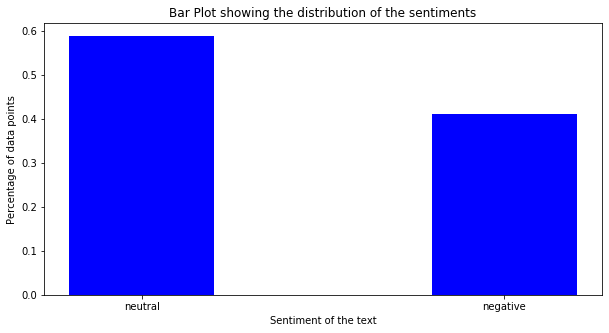

In [16]:
# Visualizing the bar plot of the sentiment columns for a better understanding

plt.figure(figsize = (10,5))
plt.bar(class_distdf.sentiment, class_distdf.percentage, color = 'blue', width = 0.4)
plt.xlabel('Sentiment of the text')
plt.ylabel('Percentage of data points')
plt.title('Bar Plot showing the distribution of the sentiments')

### DATA PREPROCESSING

#### DECONTRACTING

In [17]:
# Defining the function decontracted

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\`t", "will not", phrase)
    phrase = re.sub(r"can\`t", "can not", phrase)
    # general
    phrase = re.sub(r"n\`t", " not", phrase)
    phrase = re.sub(r"\`re", " are", phrase)
    phrase = re.sub(r"\`s", " is", phrase)
    phrase = re.sub(r"\`d", " would", phrase)
    phrase = re.sub(r"\`ll", " will", phrase)
    phrase = re.sub(r"\`t", " not", phrase)
    phrase = re.sub(r"\`ve", " have", phrase)
    phrase = re.sub(r"\`m", " am", phrase)
    return phrase

#### DEFINING THE OWN SET OF STOPWORDS

In [18]:
# Defining the custom stop word list

stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn','hasn', 'haven','isn', 'ma',\
            'mightn','mustn','needn', 'shan', "shan't", 'shouldn', 'wasn', 'weren', 'won', 'wouldn']

#### CLEANING OR PREPROCESSING

In [19]:
def preprocess(text_array):
    # Initializing an empty list named preprocessed_total_train
    preprocessed_text = []

    for sentence in text_array:
        sentence = str(sentence)
        sent = decontracted(sentence)
        sent = sent.replace('\\r',' ')
        sent = sent.replace('\\t',' ')
        sent = sent.replace('\\"',' ')
        sent = sent.replace('\\n',' ')
        sent = re.sub('[0-9]+',' ',sent)
        sent = re.sub('[^A-Za-z]+',' ',sent)
        sent = re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]+',' ',sent) # Removing the punctuations
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords and len(e)>=3)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

#### CLEANING THE GIVEN TEXT

In [20]:
# Taking the cleaned values in a list
preprocessed_text = preprocess(data['text'].values)

In [21]:
# Adding the column preprocessed_text in the dataframe
data['preprocessed_text'] = preprocessed_text

# Checking the first five rows of the dataframe
data.head()

,textID,text,sentiment,preprocessed_text
0,2a0463352b,that`s enough! I`ll do nothing for 2 hours.,neutral,enough nothing hours
1,f358968122,I have to go clothes shopping tomorrow I hate...,negative,clothes shopping tomorrow hate serious clothes...
2,449e7733f1,i am bored. :| any idea`s of a nice site?,neutral,bored idea nice site
3,6099baf6e8,I don`t think will want to come back (guys r...,negative,not think want come back guys read dms
4,f946da7a04,_thomas if only the drinking game was tonight....,neutral,thomas drinking game tonight not work till tom...


#### PERFORMING LEMMATIZATION WITH ADJECTIVE AS POS

In [22]:
lemmatizer = WordNetLemmatizer()

def lemmatize(text_array):
    # Initializing an empty list named preprocessed_total_train
    preprocessed_text = []
    
    for sentence in text_array:
        lemmatized_words = [lemmatizer.lemmatize(word, pos = "a") for word in sentence.split()]        
        preprocessed_text.append(" ".join(word for word in lemmatized_words))
    return preprocessed_text

In [23]:
# Taking the cleaned values in a list
lemmatized_text = lemmatize(data['preprocessed_text'].values)

In [24]:
data['preprocessed_text'] = lemmatized_text

# Checking the first five rows of the dataframe
data.head()

,textID,text,sentiment,preprocessed_text
0,2a0463352b,that`s enough! I`ll do nothing for 2 hours.,neutral,enough nothing hours
1,f358968122,I have to go clothes shopping tomorrow I hate...,negative,clothes shopping tomorrow hate serious clothes...
2,449e7733f1,i am bored. :| any idea`s of a nice site?,neutral,bored idea nice site
3,6099baf6e8,I don`t think will want to come back (guys r...,negative,not think want come back guys read dms
4,f946da7a04,_thomas if only the drinking game was tonight....,neutral,thomas drinking game tonight not work till tom...


#### ENCODING THE LEVELS OF SENTIMENT

In [25]:
data['class'] = np.where(data['sentiment'] == 'negative',1,0)

In [26]:
# Checking the top 5 rows of the data

data.head()

,textID,text,sentiment,preprocessed_text,class
0,2a0463352b,that`s enough! I`ll do nothing for 2 hours.,neutral,enough nothing hours,0
1,f358968122,I have to go clothes shopping tomorrow I hate...,negative,clothes shopping tomorrow hate serious clothes...,1
2,449e7733f1,i am bored. :| any idea`s of a nice site?,neutral,bored idea nice site,0
3,6099baf6e8,I don`t think will want to come back (guys r...,negative,not think want come back guys read dms,1
4,f946da7a04,_thomas if only the drinking game was tonight....,neutral,thomas drinking game tonight not work till tom...,0


#### CHECKING THE TOP 20 MOST FREQUENTLY OCCURING WORDS FOR EACH CLASS

#### NEGATIVE SENTIMENT OR THE POSITIVE CLASS OF INTEREST

In [27]:
# Subsetting the negative class

df_negative = data[data['class'] == 1]

In [28]:
# Initializing a dictionary to store the unique list of words with words as keys and values as frequency of words occuring

unique_words_neg = {}

for text in df_negative.preprocessed_text.values:
    for word in text.split():
        if word in unique_words_neg.keys():
            unique_words_neg[word] += 1
        else:
            unique_words_neg[word] = 1        

In [29]:
# Sorting the dictionary in descending order of values
sorted_unique_words_neg = dict(sorted(unique_words_neg.items(), key = lambda item:item[1], reverse = True))

In [30]:
print("The top 5% of the most frequently occuring words are {}".format(int(0.05*len(sorted_unique_words_neg))))

The top 5% of the most frequently occuring words are 536


Text(0.5, 1.0, 'Bar Plot showing the frequency of words for negative sentiment')

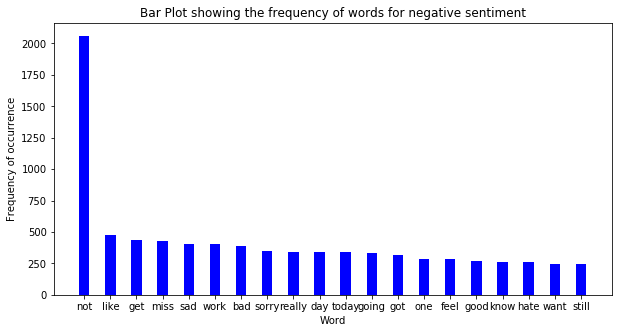

In [31]:
# Visualizing the top 20 words in terms of the frequencies as 5% of the unique words would not be clearly visible in a bar plot

x = [k for k in list(sorted_unique_words_neg.keys())[0:20]]
y = [v for v in list(sorted_unique_words_neg.values())[0:20]]

plt.figure(figsize = (10,5))
plt.bar(x,y,color = 'blue', width = 0.4)
plt.xlabel('Word')
plt.ylabel('Frequency of occurrence')
plt.title('Bar Plot showing the frequency of words for negative sentiment')

#### NEUTRAL SENTIMENT OR THE NEGATIVE CLASS

In [32]:
# Subsetting the neutral class

df_neutral = data[data['class'] == 0]

In [33]:
# Initializing a dictionary to store the unique list of words with words as keys and values as frequency of words occuring

unique_words_neu = {}

for text in df_neutral.preprocessed_text.values:
    for word in text.split():
        if word in unique_words_neu.keys():
            unique_words_neu[word] += 1
        else:
            unique_words_neu[word] = 1

In [34]:
# Sorting the dictionary in descending order of values

sorted_unique_words_neu = dict(sorted(unique_words_neu.items(), key = lambda item:item[1], reverse = True))

In [35]:
print("The top 5% of the most frequently occuring words for neutral sentiment are {}".format(int(0.05*len(sorted_unique_words_neu))))

The top 5% of the most frequently occuring words for neutral sentiment are 692


Text(0.5, 1.0, 'Bar Plot showing the frequency of words for neutral sentiment')

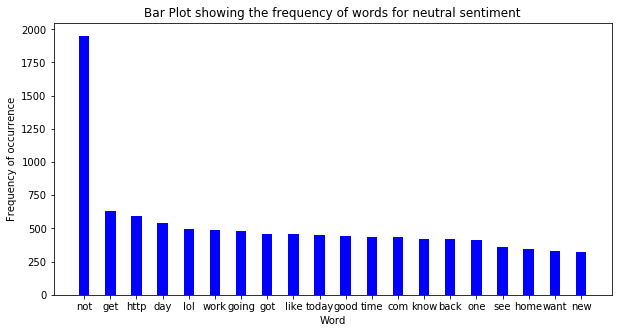

In [36]:
# Visualizing the top 20 words in terms of the frequencies as 5% of the unique words would not be clearly visible in a bar plot

x = [k for k in list(sorted_unique_words_neu.keys())[0:20]]
y = [v for v in list(sorted_unique_words_neu.values())[0:20]]

plt.figure(figsize = (10,5))
plt.bar(x,y,color = 'blue', width = 0.4)
plt.xlabel('Word')
plt.ylabel('Frequency of occurrence')
plt.title('Bar Plot showing the frequency of words for neutral sentiment')

#### CHECKING THE TOP 20 WORDS WITH THE HIGHEST IDF VALUES FOR EACH CLASS

#### NEGATIVE SENTIMENT OR THE POSITIVE CLASS OF INTEREST

In [37]:
def calculate_idf(dataset):
    if isinstance(dataset,list):
        unique_words = set()
        for sentence in dataset:
            for word in sentence.split(" "):
                if len(word) < 2:
                    continue
                unique_words.add(word)
        unique_words = sorted(list(unique_words))
        
        doc_freq = {}
        idf_values = {}
        for word in unique_words:
            count = 0
            for row in dataset:
                if word in row:
                    count+=1
            doc_freq[word] = count
            idf_values[word] = 1 + math.log((1+len(dataset))/(1+doc_freq[word]))
        
        #print("The idf values of the words of the vocabulary are: ",list(idf_values.values()))
        
        vocab = {j:i for i,j in enumerate(unique_words)}
        return vocab, idf_values
    else:
        print("Please pass a list of sentences")

In [38]:
# Getting the vocabulary and the idf scores for negative sentiment

vocab, idf_scores = calculate_idf(list(df_negative.preprocessed_text.values))

In [39]:
# Getting the sorted idf scores

sorted_idf_scores_neg = dict(sorted(idf_scores.items(), key = lambda item:item[1], reverse = True))

In [40]:
print("The top 5% of the least frequently occuring words with highest IDF scores for negative sentiment are {}".format(int(0.05*len(sorted_idf_scores_neg))))

The top 5% of the least frequently occuring words with highest IDF scores for negative sentiment are 536


Text(0.5, 1.0, 'Bar Plot showing the idf scores of 5 words for negative sentiment')

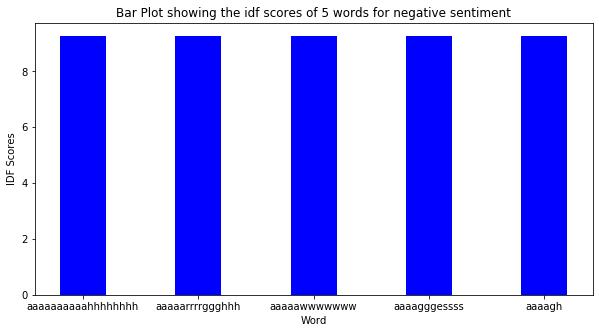

In [41]:
# Visualizing the top 5 words in terms of the frequencies as 5% of the unique words would not be clearly visible in a bar plot

x = [k for k in list(sorted_idf_scores_neg.keys())[0:5]]
y = [v for v in list(sorted_idf_scores_neg.values())[0:5]]

plt.figure(figsize = (10,5))
plt.bar(x,y,color = 'blue', width = 0.4)
plt.xlabel('Word')
plt.ylabel('IDF Scores')
plt.title('Bar Plot showing the idf scores of 5 words for negative sentiment')

In [42]:
print("The top 20 words of negative sentiment with the highest IDF scores are \n {} \n and their corresponding IDF scores are \n {}".format(list(sorted_idf_scores_neg.keys())[0:20],list(sorted_idf_scores_neg.values())[0:20]))

The top 20 words of negative sentiment with the highest IDF scores are 
 ['aaaaaaaaaahhhhhhhh', 'aaaaarrrrggghhh', 'aaaaawwwwwww', 'aaaagggessss', 'aaaagh', 'aaargh', 'aaarrrgggghhh', 'aaarrrggghhh', 'aaarrrgh', 'aaron', 'aarrgghh', 'abandoning', 'abandonment', 'abang', 'abbreviate', 'abc', 'abean', 'abhor', 'abnormal', 'abouttttto'] 
 and their corresponding IDF scores are 
 [9.265907334155747, 9.265907334155747, 9.265907334155747, 9.265907334155747, 9.265907334155747, 9.265907334155747, 9.265907334155747, 9.265907334155747, 9.265907334155747, 9.265907334155747, 9.265907334155747, 9.265907334155747, 9.265907334155747, 9.265907334155747, 9.265907334155747, 9.265907334155747, 9.265907334155747, 9.265907334155747, 9.265907334155747, 9.265907334155747]


#### NEUTRAL SENTIMENT OR THE NEGATIVE CLASS

In [43]:
# Getting the vocabulary and the idf scores for neutral sentiment

vocab, idf_scores = calculate_idf(list(df_neutral.preprocessed_text.values))

# Getting the sorted idf scores

sorted_idf_scores_neu = dict(sorted(idf_scores.items(), key = lambda item:item[1], reverse = True))

print("The top 5% of the least frequently occuring words with highest IDF scores for neutral sentiment are {}".format(int(0.05*len(sorted_idf_scores_neu))))

The top 5% of the least frequently occuring words with highest IDF scores for neutral sentiment are 692


Text(0.5, 1.0, 'Bar Plot showing the idf scores of 5 words for neutral sentiment')

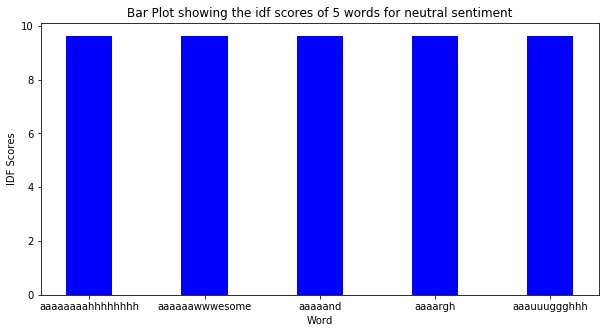

In [44]:
# Visualizing the top 5 words in terms of the idf scores as 5% of the unique words would not be clearly visible in a bar plot

x = [k for k in list(sorted_idf_scores_neu.keys())[0:5]]
y = [v for v in list(sorted_idf_scores_neu.values())[0:5]]

plt.figure(figsize = (10,5))
plt.bar(x,y,color = 'blue', width = 0.4)
plt.xlabel('Word')
plt.ylabel('IDF Scores')
plt.title('Bar Plot showing the idf scores of 5 words for neutral sentiment')

In [45]:
print("The top 20 words of neutral sentiment with the highest IDF scores are \n {} \n and their corresponding IDF scores are \n {}".format(list(sorted_idf_scores_neu.keys())[0:20],list(sorted_idf_scores_neu.values())[0:20]))

The top 20 words of neutral sentiment with the highest IDF scores are 
 ['aaaaaaaahhhhhhhh', 'aaaaaawwwesome', 'aaaaand', 'aaaargh', 'aaauuuggghhh', 'aaggh', 'aannndd', 'ababa', 'abbey', 'abbie', 'abbreviation', 'abc', 'abducted', 'aberdeen', 'ableton', 'abrjp', 'abroad', 'absence', 'absolves', 'abuzz'] 
 and their corresponding IDF scores are 
 [9.622633703874234, 9.622633703874234, 9.622633703874234, 9.622633703874234, 9.622633703874234, 9.622633703874234, 9.622633703874234, 9.622633703874234, 9.622633703874234, 9.622633703874234, 9.622633703874234, 9.622633703874234, 9.622633703874234, 9.622633703874234, 9.622633703874234, 9.622633703874234, 9.622633703874234, 9.622633703874234, 9.622633703874234, 9.622633703874234]


#### REMOVING THE EMPTY ROWS FROM PREPROCESSED DATA

In [46]:
data.fillna('', inplace=True)

# Checking for no preprocessed text
#def check_no_preprocessed_text(df):
#    return [i for i in range(len(df)) if len(str(df.iloc[i,3]).split())==0]

# Calling the function check_no_preprocessed_text to check the index which has no text

list_of_indices = check_no_text(data,3)

list_of_indices

[18,
 39,
 201,
 886,
 1084,
 2313,
 2318,
 2347,
 2469,
 2553,
 2618,
 2907,
 2988,
 3136,
 3266,
 3448,
 3960,
 4157,
 4230,
 4241,
 4251,
 4540,
 4866,
 5101,
 5102,
 6060,
 6094,
 6364,
 6959,
 7239,
 7542,
 7698,
 7898,
 7990,
 8562,
 8711,
 8774,
 8940,
 9267,
 9504,
 9861,
 9986,
 10071,
 10584,
 10661,
 10724,
 10762,
 10934,
 11004,
 11090,
 11353,
 11441,
 11476,
 11677,
 11759,
 11996,
 12235,
 12411,
 12755,
 13134,
 13326,
 13357,
 13795,
 13812,
 13859,
 13941,
 14359,
 14790,
 14833,
 15047,
 15635,
 15785,
 15790,
 15806,
 16717,
 17209,
 17344,
 17767,
 17814,
 18291,
 18379,
 18856,
 18873]

In [47]:
# Dropping the rows which has no text

data = data.drop(labels = list_of_indices, axis = 0)

data.shape

(18805, 5)

#### CHECKING AND REMOVING DUPLICATE PREPROCESSED TEXT

In [48]:
# Checking whether there are two same texts in the data

duplicate_text = data[data.duplicated(subset = ['preprocessed_text','sentiment'])]

duplicate_text

,textID,text,sentiment,preprocessed_text,class
952,0872633f57,I am so sorry.,negative,sorry,1
1234,c795a94f0e,yes(: but now,neutral,yes,0
1249,b732cd6641,I`m sorry,negative,sorry,1
1616,68e3f60e14,Can`t believe ER is over,neutral,not believe,0
1769,3918fb5ad5,rain,neutral,rain,0
...,...,...,...,...,...
18832,7dbf5dc884,Hello twitter,neutral,hello twitter,0
18848,da0e6c9116,how do we know if we won?,neutral,know,0
18867,4b6f08e92c,me too bb,neutral,,0
18877,bc2f4ee602,im at school right now,neutral,school right,0


In [49]:
data = data.drop(labels = list(duplicate_text.index), axis = 0)

# Checking for any remaining duplicate entries again after deleting the above rows

duplicate_text1 = data[data.duplicated(subset = ['preprocessed_text','sentiment'])]

duplicate_text1

,textID,text,sentiment,preprocessed_text,class


In [50]:
data.shape

(18408, 5)

#### FUNCTION TO GENERATE WORD CLOUD OF THE TOPMOST FREQUENTLY OCCURING 100 WORDS

In [51]:
def generate_wordcloud(tup):
    wcloud = WordCloud(background_color='white',
                          max_words=50, max_font_size=40,
                          random_state=42
                         ).generate(str(tup))
    return wcloud

In [52]:
negative100 = Counter(data[data['sentiment'] == 'negative']['preprocessed_text']).most_common(100)
neutral100 = Counter(data[data['sentiment'] == 'neutral']['preprocessed_text']).most_common(100)

#### WORD CLOUD OF THE TOPMOST 100 FREQUENTLY OCCURING WORDS FOR NEGATIVE SENTIMENT

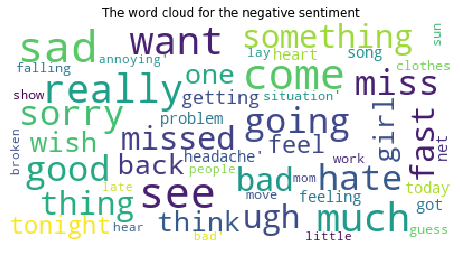

In [53]:
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(generate_wordcloud(negative100))
plt.axis("off")
plt.title("The word cloud for the negative sentiment")
plt.show()

#### WORD CLOUD OF THE TOPMOST 100 FREQUENTLY OCCURING WORDS FOR NEUTRAL SENTIMENT

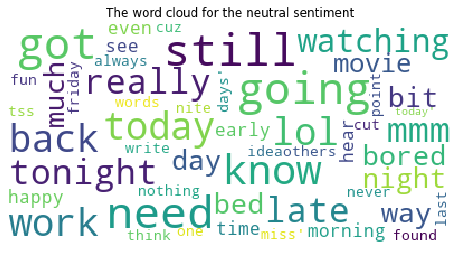

In [54]:
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(generate_wordcloud(neutral100))
plt.axis("off")
plt.title("The word cloud for the neutral sentiment")
plt.show()

#### FEATURE-1 :- LENGTH OF THE PREPROCESSED TEXT

In [55]:
data["Length_of_Preprocessed_Text"] = data["preprocessed_text"].apply(lambda x: len(x.split()))

In [56]:
data.head()

,textID,text,sentiment,preprocessed_text,class,Length_of_Preprocessed_Text
0,2a0463352b,that`s enough! I`ll do nothing for 2 hours.,neutral,enough nothing hours,0,3
1,f358968122,I have to go clothes shopping tomorrow I hate...,negative,clothes shopping tomorrow hate serious clothes...,1,9
2,449e7733f1,i am bored. :| any idea`s of a nice site?,neutral,bored idea nice site,0,4
3,6099baf6e8,I don`t think will want to come back (guys r...,negative,not think want come back guys read dms,1,8
4,f946da7a04,_thomas if only the drinking game was tonight....,neutral,thomas drinking game tonight not work till tom...,0,8


In [58]:
col_order = ["textID","text","sentiment","preprocessed_text","Length_of_Preprocessed_Text","class"]

data = data[col_order]

In [59]:
data.head()

,textID,text,sentiment,preprocessed_text,Length_of_Preprocessed_Text,class
0,2a0463352b,that`s enough! I`ll do nothing for 2 hours.,neutral,enough nothing hours,3,0
1,f358968122,I have to go clothes shopping tomorrow I hate...,negative,clothes shopping tomorrow hate serious clothes...,9,1
2,449e7733f1,i am bored. :| any idea`s of a nice site?,neutral,bored idea nice site,4,0
3,6099baf6e8,I don`t think will want to come back (guys r...,negative,not think want come back guys read dms,8,1
4,f946da7a04,_thomas if only the drinking game was tonight....,neutral,thomas drinking game tonight not work till tom...,8,0


#### FEATURE -2 :- SENTIMENT SCORE OF THE PREPROCESSED_TEXT

In [63]:
# Downloading the vader_lexicon package
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#import tqdm
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sentiment = []

for sentence in data.preprocessed_text.values:
    ss = sid.polarity_scores(str(sentence))
    sentiment.append(ss)
    
# Checking the top 2 elements of train_sentiment
sentiment[0:2]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Wazir\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.6808}]

In [64]:
# Converting the list of dictionaries into a dataframe

sentiment_score_df = pd.DataFrame(sentiment)

# Checking the first five rows of the dataframe

sentiment_score_df.head()

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.524,0.476,0.000,-0.6808
2,0.304,0.290,0.406,0.1779
3,0.149,0.851,0.000,-0.0572
4,0.000,1.000,0.000,0.0000


In [65]:
data["neg"] = sentiment_score_df["neg"]
data["neu"] = sentiment_score_df["neu"]
data["pos"] = sentiment_score_df["pos"]
data["compound"] = sentiment_score_df["compound"]

In [66]:
data.head()

,textID,text,sentiment,preprocessed_text,Length_of_Preprocessed_Text,class,neg,neu,pos,compound
0,2a0463352b,that`s enough! I`ll do nothing for 2 hours.,neutral,enough nothing hours,3,0,0.000,1.000,0.000,0.0000
1,f358968122,I have to go clothes shopping tomorrow I hate...,negative,clothes shopping tomorrow hate serious clothes...,9,1,0.524,0.476,0.000,-0.6808
2,449e7733f1,i am bored. :| any idea`s of a nice site?,neutral,bored idea nice site,4,0,0.304,0.290,0.406,0.1779
3,6099baf6e8,I don`t think will want to come back (guys r...,negative,not think want come back guys read dms,8,1,0.149,0.851,0.000,-0.0572
4,f946da7a04,_thomas if only the drinking game was tonight....,neutral,thomas drinking game tonight not work till tom...,8,0,0.000,1.000,0.000,0.0000


In [67]:
col_order = ["textID","text","preprocessed_text","Length_of_Preprocessed_Text","neg","neu","pos","compound","sentiment","class"]

In [68]:
data = data[col_order]

#### RUNNING ANOVA ON EACH OF THE SENTIMENT SCORE TO CHECK WHETHER THE MEANS OF BOTH THE CLASSES ARE DIFFERENT OR NOT

In [72]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Defining the significance level
alpha = 0.05

# Running anova on the neg feature
model = ols('neg ~ C(sentiment)', data = data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(sentiment),0.026143,1.0,0.562347,0.453326
Residual,833.594138,17931.0,NaN,NaN


In [73]:
# Running anova on the neu feature
model = ols('neu ~ C(sentiment)', data = data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(sentiment),0.020594,1.0,0.289203,0.590738
Residual,1276.885058,17931.0,NaN,NaN


In [74]:
# Running anova on the pos feature
model = ols('pos ~ C(sentiment)', data = data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(sentiment),0.085699,1.0,2.137804,0.143725
Residual,718.809816,17931.0,NaN,NaN


In [75]:
# Running anova on the compound feature
model = ols('compound ~ C(sentiment)', data = data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(sentiment),0.335598,1.0,2.376303,0.123206
Residual,2532.343275,17931.0,NaN,NaN


#### RUNNING ANOVA ON THE LENGTH OF THE PREPROCESSED TEXT

In [76]:
# Running anova on the feature Length_of_Preprocessed_Text
model = ols('Length_of_Preprocessed_Text ~ C(sentiment)', data = data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(sentiment),1183.099151,1.0,87.673376,8.587760e-21
Residual,248377.832401,18406.0,NaN,NaN


#### OBSERVATIONS:-

1) There were 83 rows with no preprocessed text which were deleted.

2) There were 397 duplicate rows with same preprocessed text and sentiment which were deleted.

3) The most rarely occuring words with the highest IDF values for negative and neutral sentiments are mentioned in cell nos. 42 and 45 respectively.

4) The 20 most frequently occuring words for negative and neutral sentiments are plotted in cell no. 31 and 36.

5) The duplicate row removal, stopwords and punctuations removal and lemmatization have been done as part of preprocessing.

6) The Anova results show that the length of the preprocessed_text is an important determinant of the sentiment as the mean length of the preprocessed_text is different across the two different levels of sentiments.

#### CONCLUSION:-

1) We would featurize the text data using TFIDF and BOW and would use the Length_Of_Preprocessed_Text as the other feature for fitting the various ML models.

#### SAVING THE FINAL PREPROCESSED DATA

In [77]:
data.head()

,textID,text,preprocessed_text,Length_of_Preprocessed_Text,neg,neu,pos,compound,sentiment,class
0,2a0463352b,that`s enough! I`ll do nothing for 2 hours.,enough nothing hours,3,0.000,1.000,0.000,0.0000,neutral,0
1,f358968122,I have to go clothes shopping tomorrow I hate...,clothes shopping tomorrow hate serious clothes...,9,0.524,0.476,0.000,-0.6808,negative,1
2,449e7733f1,i am bored. :| any idea`s of a nice site?,bored idea nice site,4,0.304,0.290,0.406,0.1779,neutral,0
3,6099baf6e8,I don`t think will want to come back (guys r...,not think want come back guys read dms,8,0.149,0.851,0.000,-0.0572,negative,1
4,f946da7a04,_thomas if only the drinking game was tonight....,thomas drinking game tonight not work till tom...,8,0.000,1.000,0.000,0.0000,neutral,0


In [82]:
data.iloc[:,[0,2,3,9]].to_csv("preprocessed_data.csv", index = None)